# This notebook was used for analysis of the age and sex demographics.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
sns.set_style('whitegrid')
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('font', size=12)


%matplotlib inline


In [22]:
#read in data and lowercase variable names

pbtype = pd.read_csv("pbtype_cleaned.csv")
pbtype.columns = pbtype.columns.str.lower()

## Look at Age x Sex

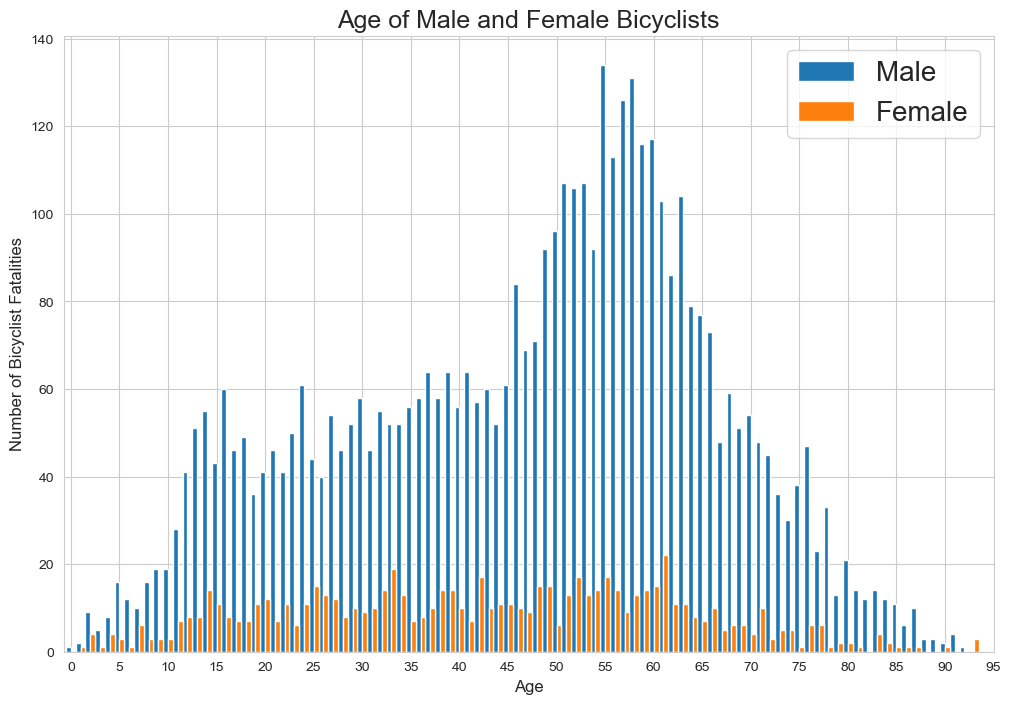

In [23]:
#remove reported as unknown, unknown, and not reported
#remove 999 and 998 age

pbfem = pbtype[pbtype.pbsexname == 'Female']
pbfem = pbfem[pbfem.pbage <=120]
pbfem = pbfem.pbage.value_counts().sort_index()

pbmasc = pbtype[pbtype.pbsexname == 'Male']
pbmasc = pbmasc[pbmasc.pbage <=120]
pbmasc = pbmasc.pbage.value_counts().sort_index()

pbgender = pd.concat([pbmasc, pbfem], axis=1)

pbgender = pbgender.reset_index()
pbgender.columns = ['Age', 'Male', 'Female']
pbgender

pbgender.plot(x='Age', y=["Male", "Female"], kind="bar", figsize=(12,8), xticks = range(0,100,5), width=1)
plt.xticks(rotation='horizontal')
plt.title('Age of Male and Female Bicyclists')
plt.ylabel('Number of Bicyclist Fatalities')
plt.legend(fontsize = 20)

plt.savefig("AgeGender.png", transparent=True)

## Higher resolution of the Female data above

fem 738
masc 4635


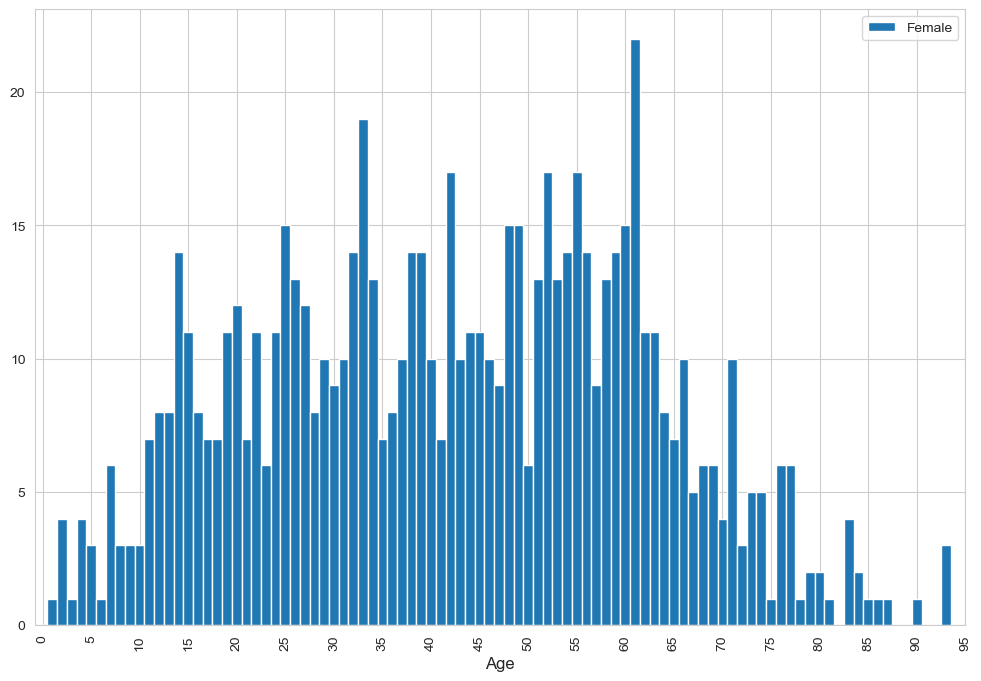

In [24]:
print("fem",pbfem.sum())
print("masc",pbmasc.sum())

pbgender.plot(x='Age', y="Female", kind="bar", figsize=(12,8), xticks = range(0,100,5), width=1)
pass

## Exploring the Unknown Variables to See if We Should Include Them

<module 'matplotlib.pyplot' from '/Users/meralbasit/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

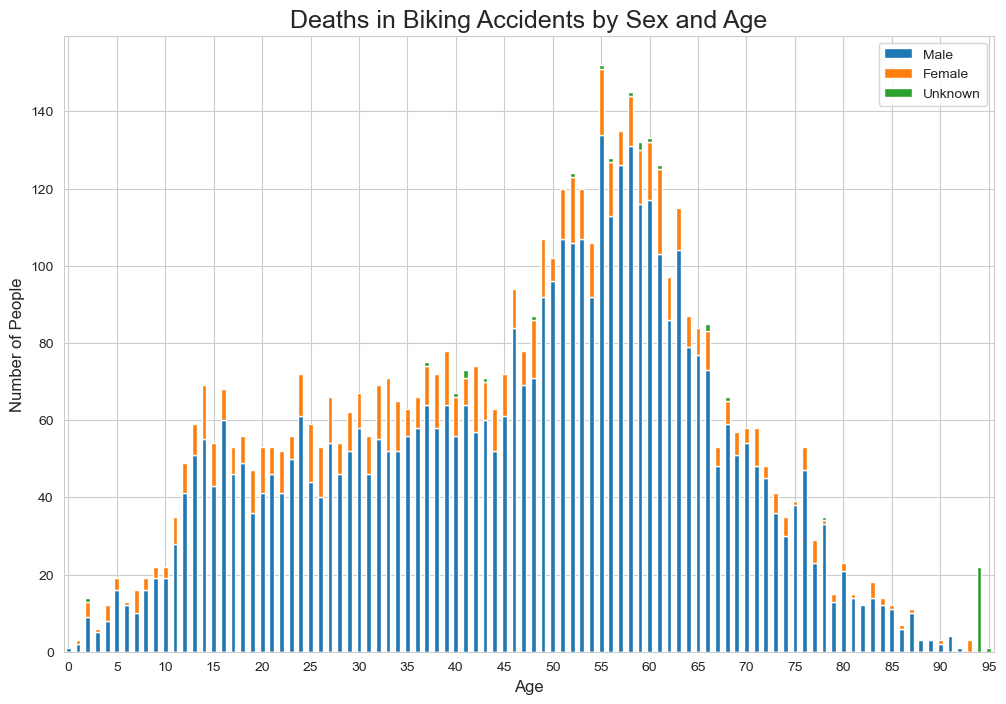

In [25]:
#consolidate reported as unknown (7), unknown (5), and not reported (30)
#remove 999 and 998 age

#make female, male, and unknown series
pbfem = pbtype[pbtype.pbsexname == 'Female']
pbfem = pbfem[pbfem.pbage <=120]
pbfem = pbfem.pbage.value_counts().sort_index()

pbmasc = pbtype[pbtype.pbsexname == 'Male']
pbmasc = pbmasc[pbmasc.pbage <=120]
pbmasc = pbmasc.pbage.value_counts().sort_index()

pbunknown = pbtype[pbtype.pbsexname != 'Male']
pbunknown = pbunknown[pbunknown.pbsexname != 'Female']
pbunknown = pbunknown.pbage.value_counts().sort_index()

#combine series into one DF and name columns
pbsex = pd.concat([pbmasc, pbfem, pbunknown],axis=1)
pbsex.columns = ['Male', 'Female', 'Unknown']

#plot
pbsex.plot(kind='bar', stacked=True, title='Deaths in Biking Accidents by Sex and Age', xticks = range(0,100,5), figsize=(12,8))
plt.xlabel('Age')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of People')
plt

Determined that unknowns were irrelevant enough to eliminate from analysis

In [26]:
# getting number of 998 and 999 ages for report
pbtype.pbage.value_counts().sort_index(ascending=False)

999    16
998    61
95      1
92      4
91      3
       ..
4       6
3      14
2       3
1       3
0       1
Name: pbage, Length: 96, dtype: int64

## Seeing if other variables have interesting patterns between males and females

In [27]:
#make a function to plot percentage of males and females for any variable, include d for dictionary if needed

def percentmalefemale(var,d=None):
    f = pbtype[pbtype.pbsexname == 'Female']
    m = pbtype[pbtype.pbsexname == 'Male']
    
    f = f[var].value_counts()
    m = m[var].value_counts()
    
    fm = pd.concat([m, f], axis=1)
    fm.columns = 'Male', 'Female'
    fm.Male.sum()
    fm.Male = round(fm.Male / fm.Male.sum() * 100,2)
    fm.Female = round(fm.Female / fm.Female.sum() * 100, 2)
    fm.index.name=var
    
    #add a col with the difference
    fm['Difference'] = abs(fm.Female - fm.Male)

    if d != None:
        fm.index = fm.index.map(d)
    
    fm = fm.sort_values('Difference', ascending=False)
    
    return fm

## Get largest average difference for each column in columns 6 through 27

In [28]:
import math

over_3 = []
all_values = []
l_avg_diff = 0
cols = pbtype.columns[6:]

for col in cols:
    tab = percentmalefemale(col)
    l_avg_diff = l_avg_diff + tab.iloc[0][2]
    if tab.iloc[0][2] > 3:
        over_3.append((tab.index.name, tab.iloc[0][2]))
    all_values.append(tab.iloc[0][2])

avg = 0
all_values = [0 if math.isnan(x) else x for x in all_values]

for value in all_values:
    avg += value

avg = avg/len(all_values)
print("Average largest difference for columns:",round(avg,2),'%')

Average largest difference for columns: 2.22 %


## Find anything with a difference over 3

In [29]:
import math

over_5 = []
cols = pbtype.columns[6:]
diff = []

for col in cols:
    tab = percentmalefemale(col)
    for row in tab.Difference:
        diff.append(row)
    #print(tab.head(3))
    if tab.iloc[0][2] > 5:
        over_5.append((tab.index.name, tab.iloc[0][2]))

diff = [0 if math.isnan(x) else x for x in diff]
avg = sum(diff)/len(diff)
print('Average difference:', round(avg,2),'%')
print('Columns with a difference over 5%')
for item in over_5:
    print(item)

Average difference: 0.46 %
Columns with a difference over 5%
('bikepos', 6.5)
('bikeposname', 6.5)


In [10]:
#look more into bikeposname

              Male %  Female %  Difference
Travel Lane    79.59     73.09        6.50
Bicycle Lane    7.63     12.18        4.55
Sidewalk       10.15     11.91        1.76


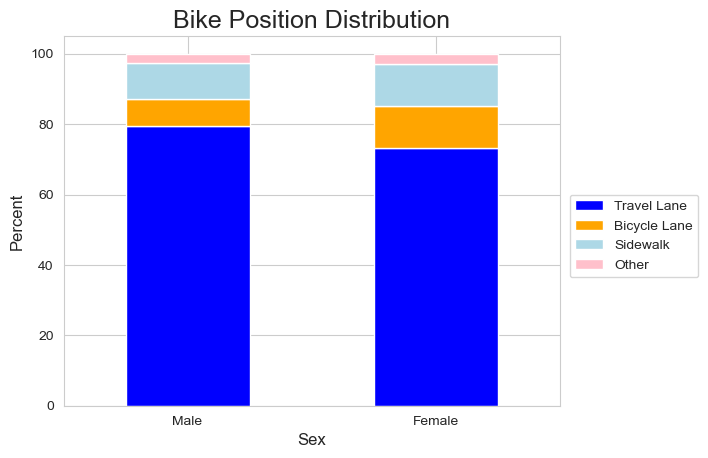

In [30]:
import numpy as np

a = percentmalefemale('bikeposname')
a.columns = ['Male %', 'Female %', 'Difference']
a.index.name = 'Bike Position'
a=a.fillna(0)
a.index = ['Travel Lane', 'Bicycle Lane', 'Sidewalk', 'Unknown', 'Shared-Use Path', 'Other', 'Parking Lot/Other', 'Driveway']
a = a.head(3)

print(a)

#make an other category
new_row = pd.DataFrame({'Male %':2.62, 'Female %':2.80, 'Difference':0.18}, index=['Other'])
a = pd.concat([a,new_row], axis=0)

a=a.T

a = a.drop('Difference', axis=0)
a.index=['Male','Female']
a.plot(kind='bar', stacked=True, color=['blue','orange','#ADD8E6','pink'])
plt.legend(loc='upper center', bbox_to_anchor=(1.15,0.59))
plt.xticks(rotation=0)
plt.ylabel('Percent')
plt.xlabel('Sex')
plt.title('Bike Position Distribution')
plt.savefig("bikepos.png", transparent=True)